# Week 6 Lab 2 - CCDE_Filter

In [2]:
%pylab inline

from sympy import *
init_printing(use_unicode = True, fontsize = 16)

pi2 = pi * 2

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os
import sys 

if os.name == 'nt':
    path = 'C:\\Users\\Wei\\Dropbox\\Coding\\notebooks\\專案\\待處理\\Waves\\bitbucket\\github\\codes'
else:
    path = '/home/wei/Dropbox/Coding/notebooks/專案/待處理/Waves/bitbucket/github/codes'
    
sys.path.append(path)

from waves.sound import *
from waves.tools.dsp import *
from waves.tools.dsp.filters import *

### Delta function

In [4]:
delta = np.zeros(N_SAMPLES)
delta[0] = 1

# Z transform 
## 4.8.a Intuitive IIR designs

## Z transform of Leaky Integrator

$
\begin{align}
y[n] &= (1-\lambda)x[n] + \lambda y[n-1] \\
Z\{y[n]\} &= Z\{(1-\lambda)x[n] + \lambda y[n-1]\} \\
Y(z) &= {(1-\lambda)X(z) + \lambda z^{-1} Y(z)} \\ 
Y(z) - \lambda z^{-1} Y(z) &= (1-\lambda)X(z) \\
(1-\lambda z^{-1}) Y(z) &= (1-\lambda)X(z) \\
H(z) = \frac{Y(z)}{X(z)} &= \frac{1-\lambda}{1-\lambda z^{-1}}
\end{align}
$

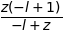

In [5]:
G0, l, w0, w = symbols('G0, l, w0, w', real = True)
H, p, z = symbols('H, p, z')

# z = E**(I*w) 
p = E**(I*w0)

num = (1 - l)
# num = num.collect(z).rewrite(cos).simplify()

denum = (1 - l*z**(-1))
denum = denum.expand().collect(z).rewrite(cos).simplify()

H = num / denum
H

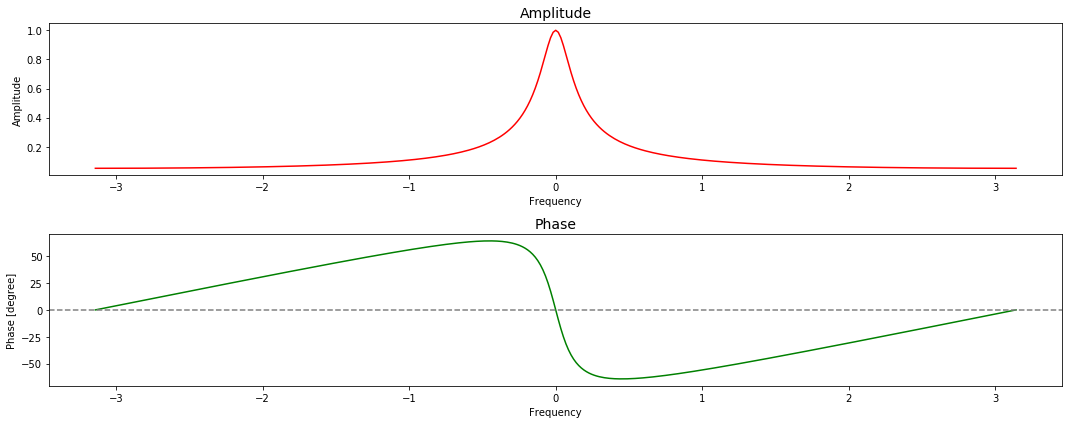

In [6]:
l = 0.9
f, h = filtering.get_H_from_polynomials([[1-l]],[[1, -l]], 360, plot = True)

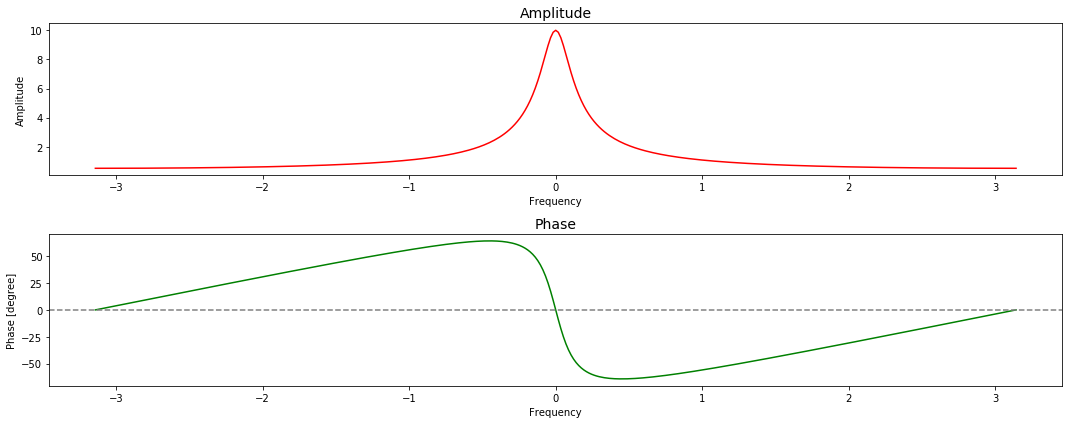

In [7]:
l = 0.9
f, h = filtering.get_H_from_zeros_poles([0],[l], 360, plot = True)

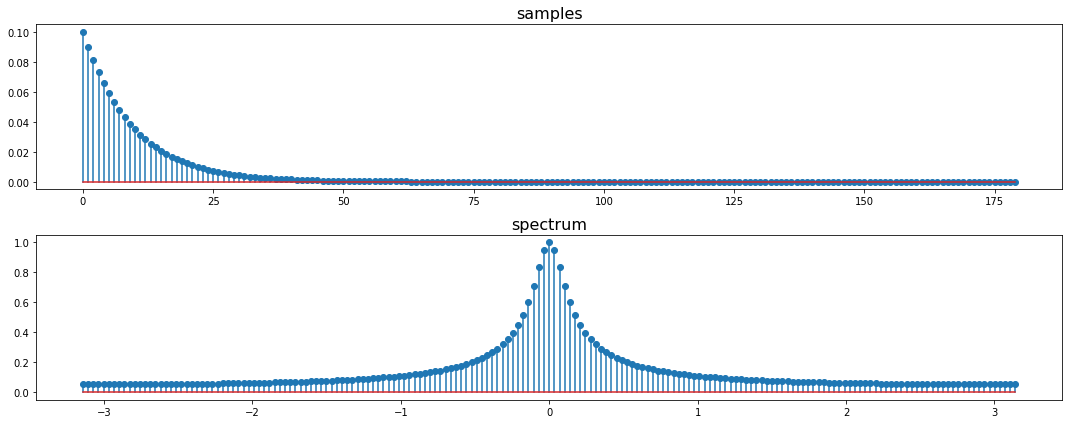

In [9]:
_ = fourier.dtft(LeakyIntegrator(lamda = l).filter(delta)) 

## Week 6 / 4.10* Implementation of digital filters

### 將 H(z) 轉成 CCDE

#### Leaky Integrator
$
H(z) = \frac{(1-\lambda)}{1-\lambda z^{-1}} \\
y[n] = (1-\lambda)x[n] + \lambda y[n-1]
$

In [8]:
N = 300
window_size = int(N * (1-l))

x = np.linspace(0, PI2, N)
y = np.sin(x) + np.random.randn(N) * 0.1

l = 0.9
b, a = filtering.get_b_a_from_polynomials([[1-l]], [[1, -l]] )
b, a

(array([0.1]), array([ 1. , -0.9]))

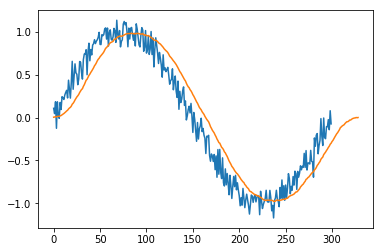

In [9]:
conv = convolver.moving_average(y, window_size=window_size)
plt.plot(y)
plt.plot(conv);

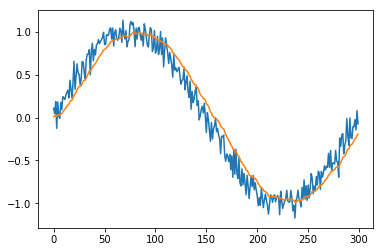

In [10]:
b, a = filtering.get_b_a_from_polynomials([[1-l]], [[1, -l]] )

ccde = CCDE_Filter(b, a)
filtered = ccde.filter(y) 

plt.plot(y)
plt.plot(filtered);

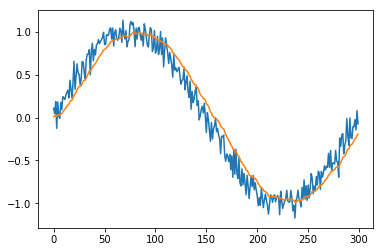

In [11]:
b, a = filtering.get_b_a_from_polynomials([[1-l]], [[1, -l]] )

ccde = LeakyIntegrator(lamda = l)
filtered = ccde.filter(y) 

plt.plot(y)
plt.plot(filtered);

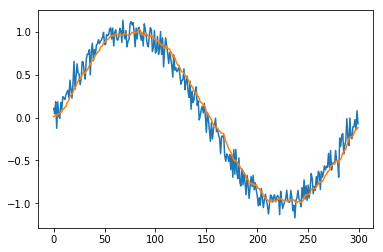

In [12]:
b, a = filtering.get_b_a_from_polynomials([[1-l]], [[1, -l]] )

ccde = MovingAverage(size = 10)
filtered = ccde.filter(y) 

plt.plot(y)
plt.plot(filtered);

## Z transform of resonator (band-pass filter)
$
\begin{align}
y[n] &= G0 x[n] + a1 y[n-1] + a2 y[n-2] \\
H(z) = \frac{Y(z)}{X(z)} &= \frac{G0}{(1-p z^{-1})(1-\bar{p} z^{-1})} \hspace{2cm} p = \lambda e^{j\omega_0} \\
H(z) &= \frac{G0}{1 - (p +\bar{p})z^{-1} + p\bar{p} z^{-2}} \\
H(z) &= \frac{G0}{1 - 2\lambda\cos(\omega_0)z^{-1} + |\lambda|^2 z^{-2}} \space \Rightarrow \space a1 = -2\lambda\cos(\omega_0) ;\space a2 = |\lambda|^2 \\
\end{align}
$

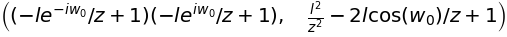

In [41]:
## Z transform of resonator (band-pass filter)

from sympy import symbols, conjugate, E, I
    
l, w0= symbols('l, w0', real = True)
p = E**(I*w0)

product, simplified = filtering.simplify_coefficients_product([(1,-l*p),(1,-l*conjugate(p))])
product, simplified

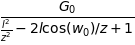

In [13]:
G0, l, w0, w = symbols('G0, l, w0, w', real = True)
H, p, z = symbols('H, p, z')

# z = E**(I*w) 
p = E**(I*w0)

num = G0
# num = num.collect(z).rewrite(cos).simplify()

denum = ((1-l*p*z**(-1))*(1-l*conjugate(p)*z**(-1)))
denum = denum.expand().collect(z).rewrite(cos).simplify()

H = num / denum
H

In [14]:
l = 0.9
G0 = 1 / 6
w0 = np.pi/3
p = np.exp(1j * w0)

b, a = filtering.get_b_a_from_polynomials([[G0]], [[1, -l * p], [1, -l * np.conj(p)]])
b, a 

(array([0.16666667]), array([ 1.  +0.j, -0.9 +0.j,  0.81+0.j]))

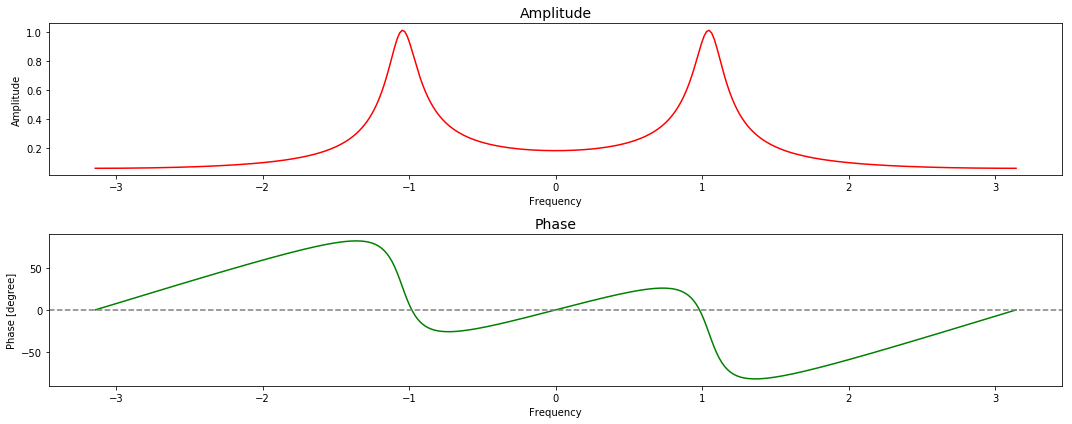

In [15]:
f, h = filtering.get_H_from_polynomials([b],[a], 360, plot = True)

C:\Users\Wei\Dropbox\Coding\notebooks\專案\待處理\Waves\bitbucket\github\codes\waves\tools\dsp\__init__.py:714: ComplexWarning: Casting complex values to real discards the imaginary part
  buff[0] = value
C:\Softwares\Python\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


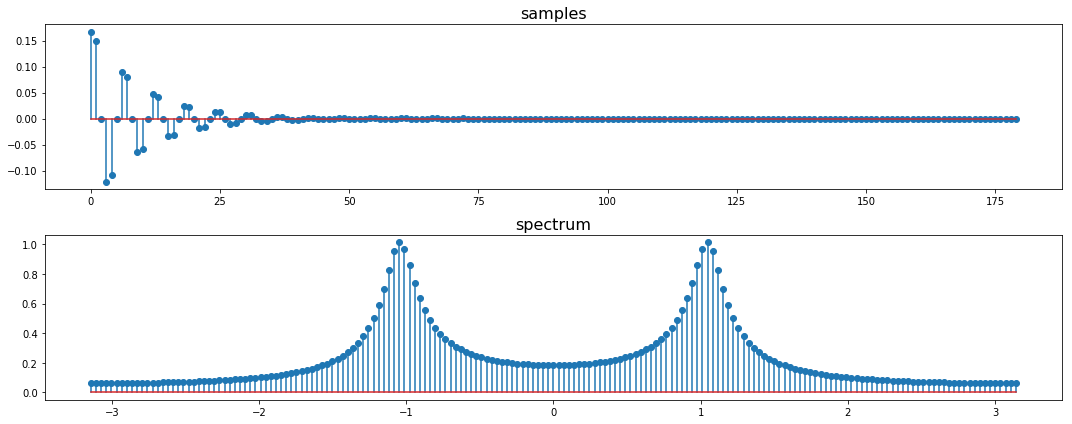

In [16]:
b, a = filtering.get_b_a_from_polynomials([[G0]], [[1, -l * p], [1, -l * np.conj(p)]])

ccde = CCDE_Filter(b, a)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

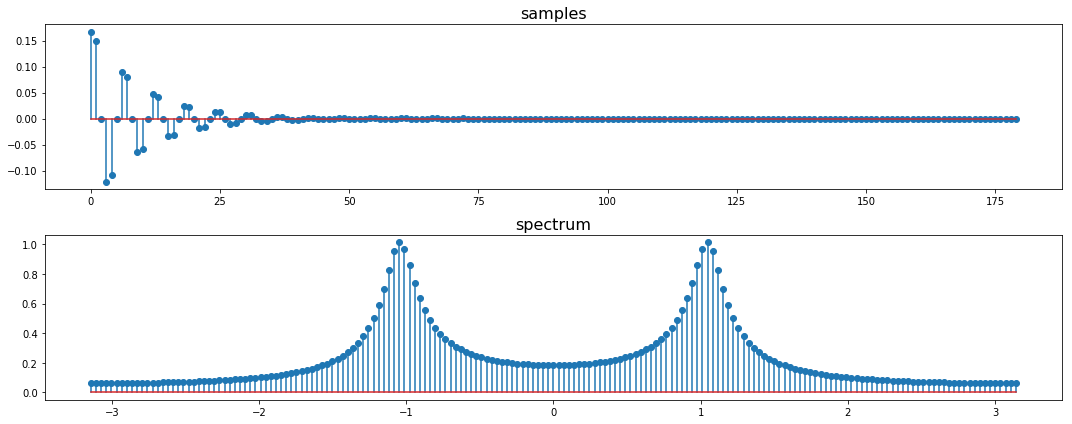

In [17]:
ccde = Resonator(omega = w0, lamda = l, gain = G0)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

## Z transform of DC-removal
- DC-balanced signal has zero-sum.  
- DTFT at 0 is 0.  

$
\begin{align}
\lim_{N \to \infty} \sum_{n = -N}^{N} x[n] &= 0 \\
X(0) = \sum_{n = -\infty}^{\infty} x[n]e^{j0n} = \sum_{n = -\infty}^{\infty} x[n] &= 0 \\
\end{align}
$  
  
  
### According to Z-tranform:  
  
$
\begin{align}
\sum_{k = 0}^{N-1} a_k y[n-k] &= \sum_{k = 0}^{M-1} b_k x[n-k] \\
Y(z)\sum_{k=0}^{N-1}a_k z^{-k} &= X(z) \sum_{k=0}^{M-1} b_k z^{-k} \\
H(z) = \frac{Y(z)}{X(z)} &= \frac{\sum_{k=0}^{M-1} b_k z^{-k}}{\sum_{k=0}^{N-1}a_k z^{-k}} \\
H(z) &= \frac{1 - z^{-1}}{1 - \lambda z^{-1}} \Rightarrow y[n] = \lambda y[n-1] + x[n] - x[n-1] \\
\end{align}
$

In [18]:
G0, l, w0, w = symbols('G0, l, w0, w', real = True)
H, p, z = symbols('H, p, z')

# z = E**(I*w) 
p = E**(I*w0)

num = 1-z**-1
num = num.collect(z).rewrite(cos).simplify()

denum = (1-l*z**-1)
denum = denum.expand().collect(z).rewrite(cos).simplify()

H = num / denum
H

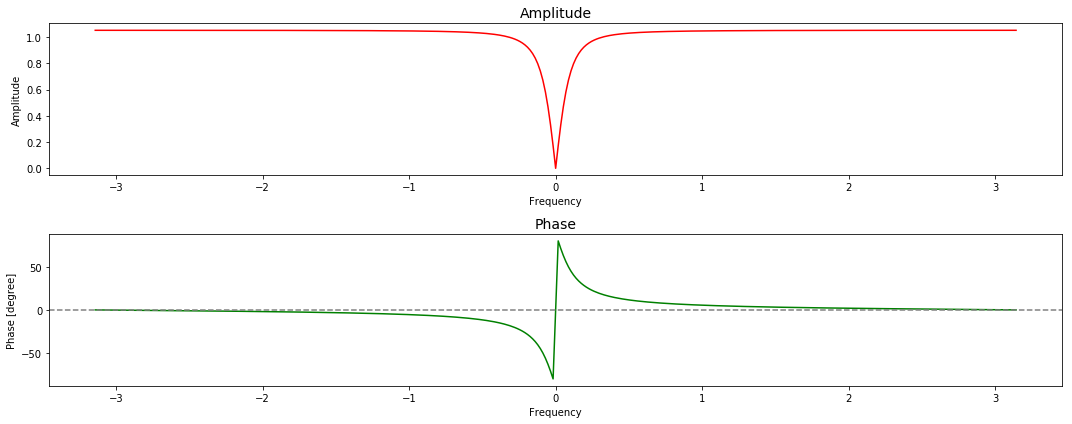

In [19]:
l = 0.9 
f, h = filtering.get_H_from_polynomials([(1, -1)],[(1, -l)], 360, plot = True)

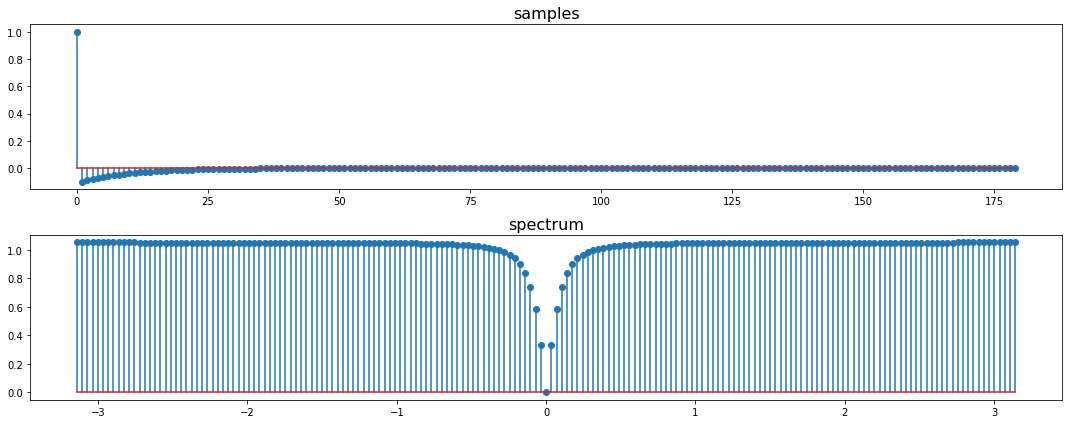

In [20]:
b, a = filtering.get_b_a_from_polynomials([(1, -1)],[(1, -l)])

ccde = CCDE_Filter(b, a)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

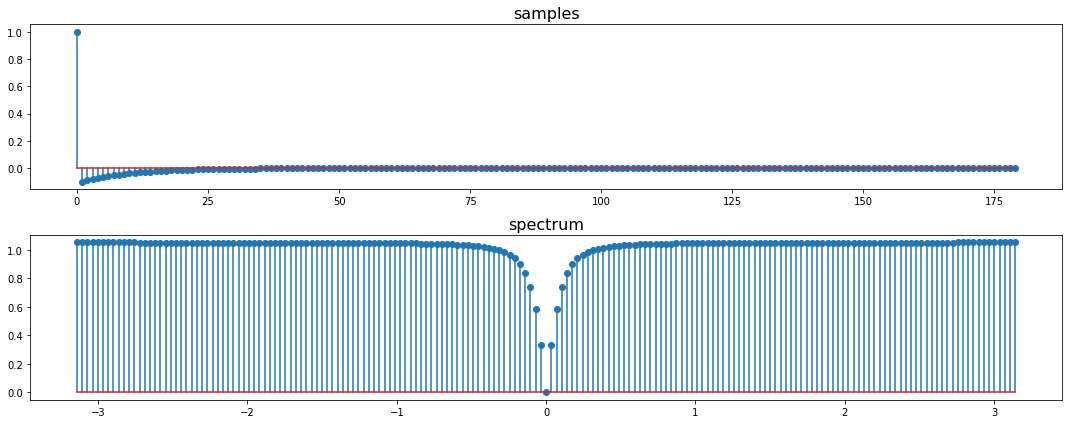

In [21]:
ccde = DC_remover(lamda = l)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

## Z transform of Hum-removal
- DC-balanced signal has zero-sum.  
- DTFT at 0 is 0.  

$
\begin{align}
X(j\omega_0) = \sum_{n = -\infty}^{\infty} x[n]e^{j\omega_0n} &= 0 \\
\end{align}
$  
  
  
### According to Z-tranform:  
  
$
\begin{align}
p &= e^{j\omega_0} \\
H(z) &= \frac{(1 - p z^{-1})(1 - \bar{p} z^{-1})}{(1 - \lambda p z^{-1})(1 - \lambda \bar{p} z^{-1})} \\
\end{align}
$

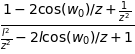

In [22]:
G0, l, w0, w = symbols('G0, l, w0, w', real = True)
H, p, z = symbols('H, p, z')

# z = E**(I*w) 
p = E**(I*w0)

num = ((1-p*z**(-1))*(1-conjugate(p)*z**(-1))) 
num = num.collect(z).rewrite(cos).simplify()

denum = ((1-l*p*z**(-1))*(1-l*conjugate(p)*z**(-1)))
denum = denum.expand().collect(z).rewrite(cos).simplify()

H = num / denum
H

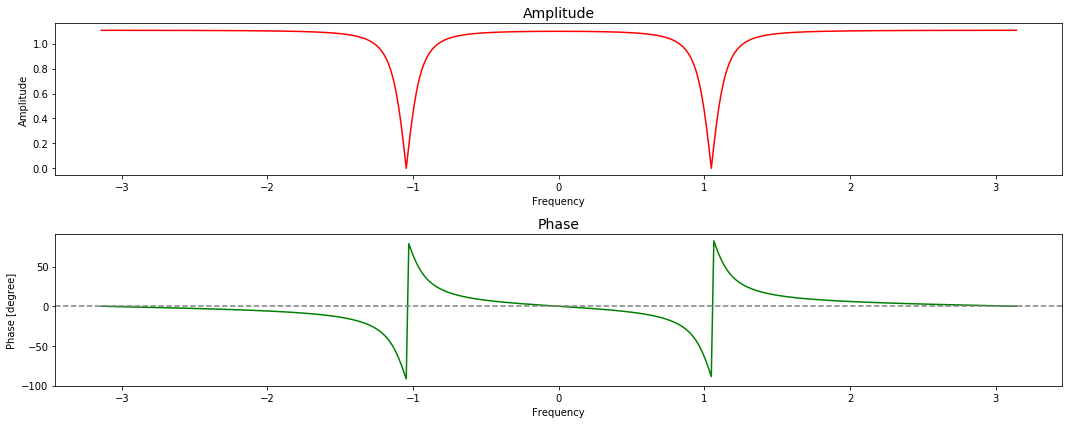

In [23]:
l = 0.9 
w0 = np.pi/3
p = np.exp(1j*w0)
f, h = filtering.get_H_from_polynomials([(1, -p), (1, -np.conj(p))],[(1, -l*p), (1, -l*np.conj(p))], 360, plot = True)

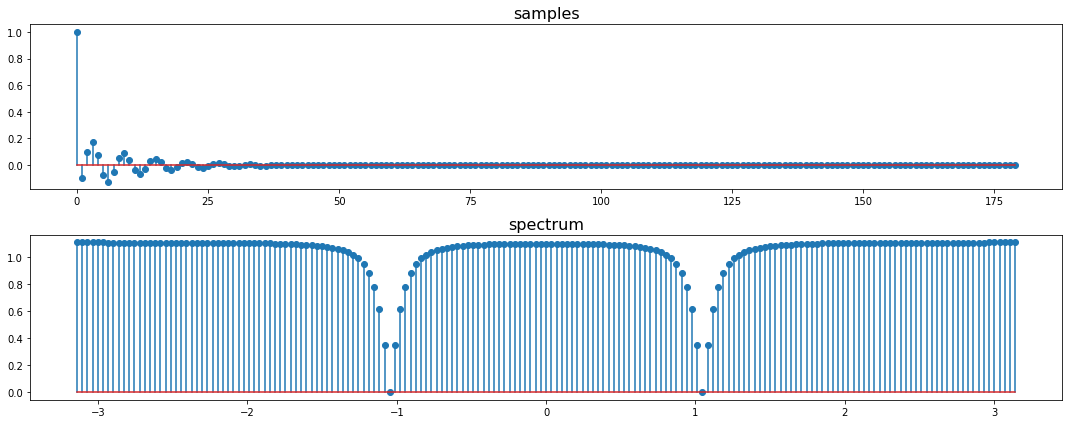

In [24]:
b, a = filtering.get_b_a_from_polynomials([(1, -p), (1, -np.conj(p))],[(1, -l*p), (1, -l*np.conj(p))])

ccde = CCDE_Filter(b, a)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

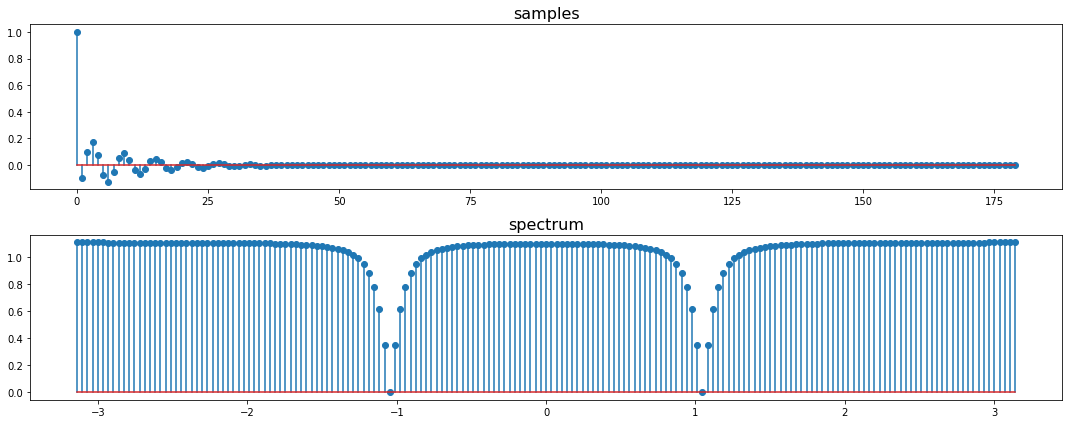

In [25]:
ccde = Hum_remover(omega = w0, lamda = l)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

# 4.9.a IIR designs

## Butterworth


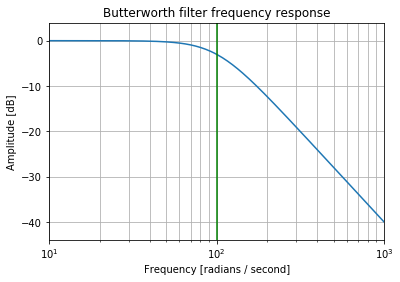

In [26]:
from scipy import signal
import matplotlib.pyplot as plt

b, a = signal.butter(2, 100, 'lowpass', analog=True)  # {‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’}, 
w, h = signal.freqs(b, a)

plt.plot(w, 20 * np.log10(abs(h)))

plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

In [27]:
b, a

(array([10000.]), array([1.00000000e+00, 1.41421356e+02, 1.00000000e+04]))

C:\Softwares\Python\lib\site-packages\matplotlib\ticker.py:1943: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


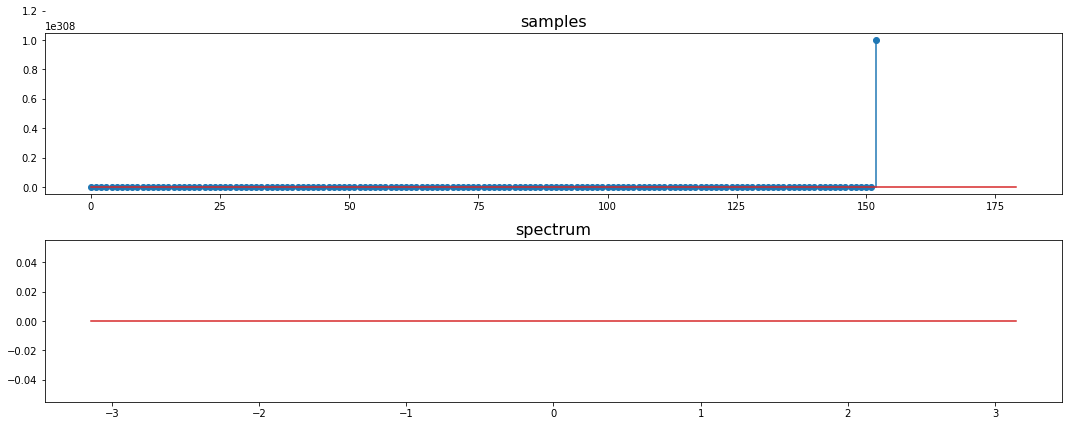

In [28]:
# b, a = filtering.get_b_a_from_polynomials([(1, -p), (1, -np.conj(p))],[(1, -l*p), (1, -l*np.conj(p))])

ccde = CCDE_Filter(b, a)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

In [29]:
# filtering.plot_freq_response(w, h)

## Chebyshev 

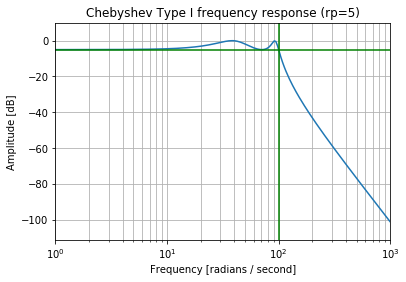

In [30]:
b, a = signal.cheby1(4, 5, 100, 'low', analog=True)
w, h = signal.freqs(b, a)

plt.plot(w, 20 * np.log10(abs(h)))

plt.xscale('log')
plt.title('Chebyshev Type I frequency response (rp=5)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-5, color='green') # rp
plt.show()

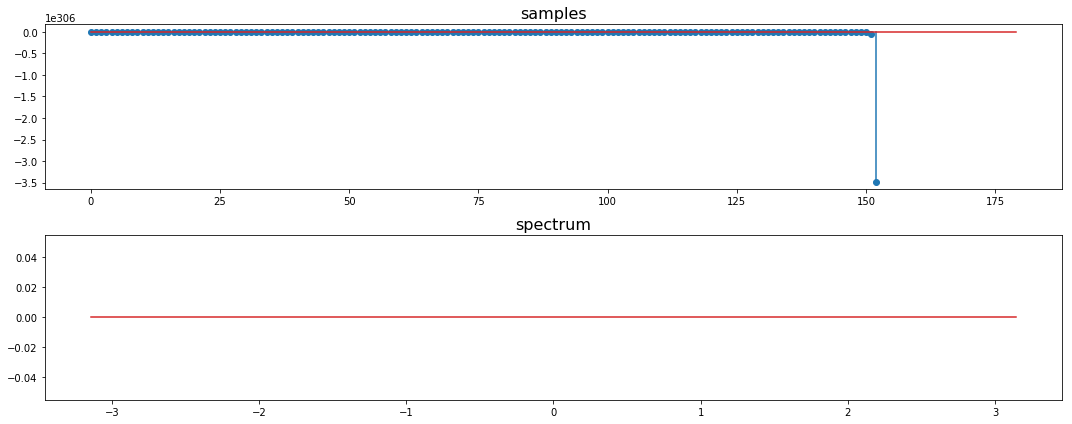

In [31]:
ccde = CCDE_Filter(b, a)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

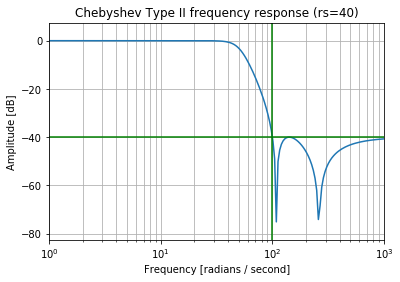

In [32]:
b, a = signal.cheby2(4, 40, 100, 'low', analog=True)
w, h = signal.freqs(b, a)

plt.plot(w, 20 * np.log10(abs(h)))

plt.xscale('log')
plt.title('Chebyshev Type II frequency response (rs=40)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rs
plt.show()

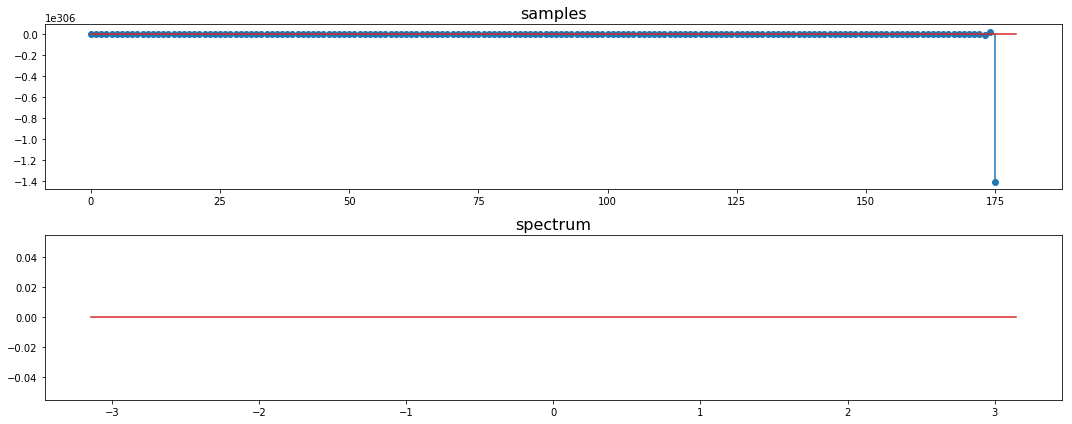

In [33]:
ccde = CCDE_Filter(b, a)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

## Elliptic

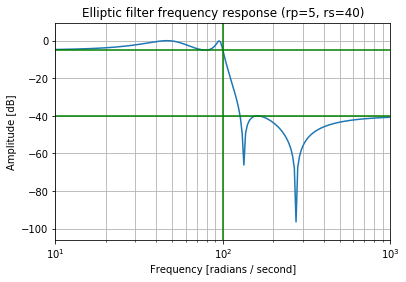

In [34]:
b, a = signal.ellip(4, 5, 40, 100, 'low', analog=True)
w, h = signal.freqs(b, a)

plt.semilogx(w, 20 * np.log10(abs(h)))

plt.title('Elliptic filter frequency response (rp=5, rs=40)')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.axhline(-40, color='green') # rs
plt.axhline(-5, color='green') # rp
plt.show()

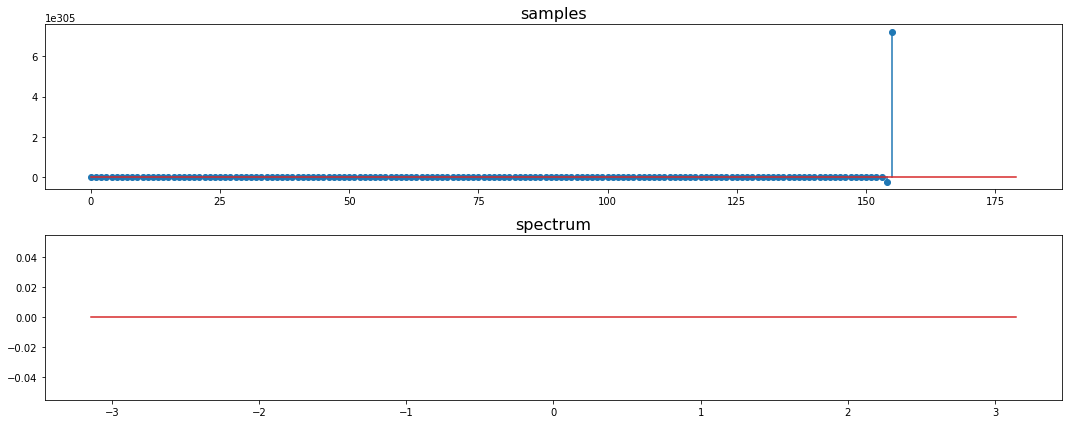

In [35]:
ccde = CCDE_Filter(b, a)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

## 4.9.c FIR designs

### Minimax

In [36]:
b = signal.remez(72, [0, 0.1, 0.2, 0.4, 0.45, 0.5], [0, 1, 0])

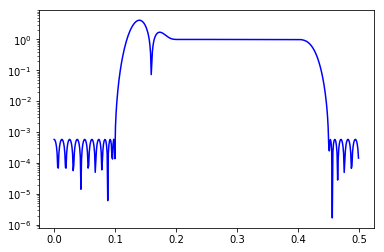

In [37]:
from scipy import signal
bpass = signal.remez(72, [0, 0.1, 0.2, 0.4, 0.45, 0.5], [0, 1, 0])
freq, response = signal.freqz(bpass)
ampl = np.abs(response)

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.semilogy(freq/(2*np.pi), ampl, 'b-')  # freq in Hz
plt.show()

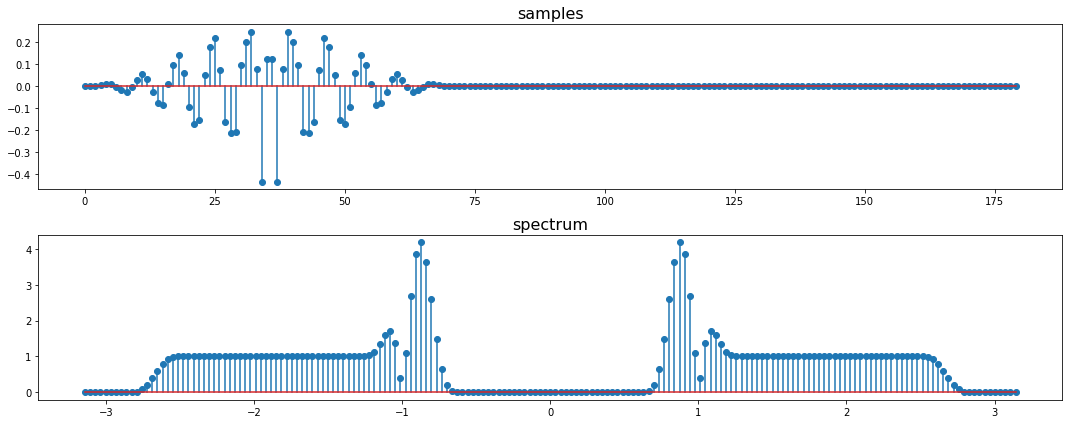

In [38]:
b = signal.remez(72, [0, 0.1, 0.2, 0.4, 0.45, 0.5], [0, 1, 0])

ccde = CCDE_Filter(b)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

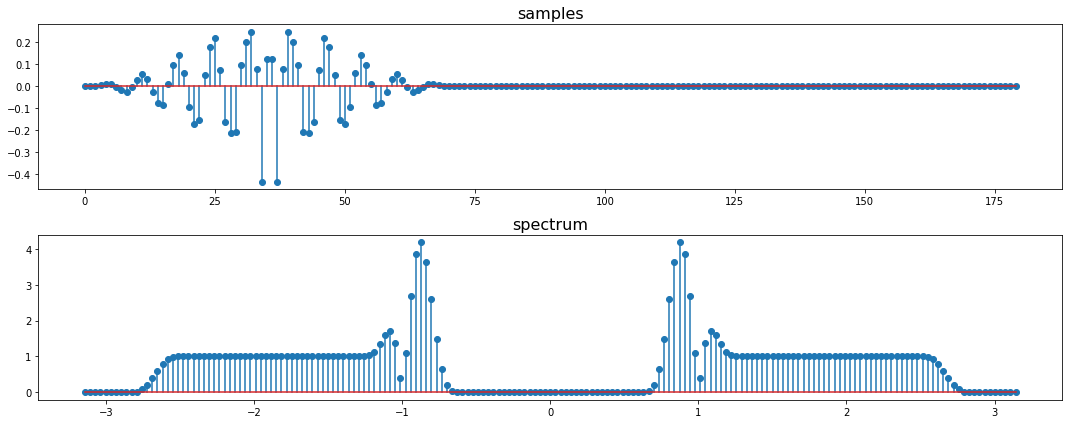

In [40]:
ccde = Remez(72, [0, 0.1, 0.2, 0.4, 0.45, 0.5], [0, 1, 0])
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


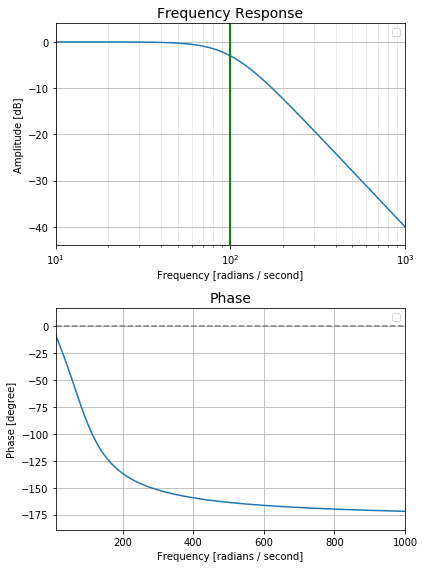

In [43]:
from scipy import signal

b, a = signal.butter(2, 100, 'lowpass', analog=True)  # {‘lowpass’, ‘highpass’, ‘bandpass’, ‘bandstop’}, 
w, h = signal.freqs(b, a)

filtering.plot_freq_phase_response(w, h, wc = [100, ])

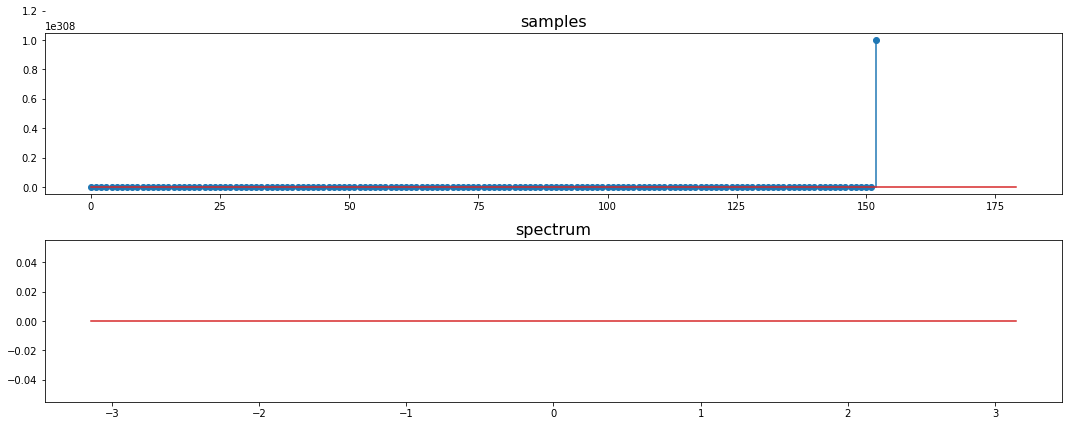

In [44]:
ccde = CCDE_Filter(b, a)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

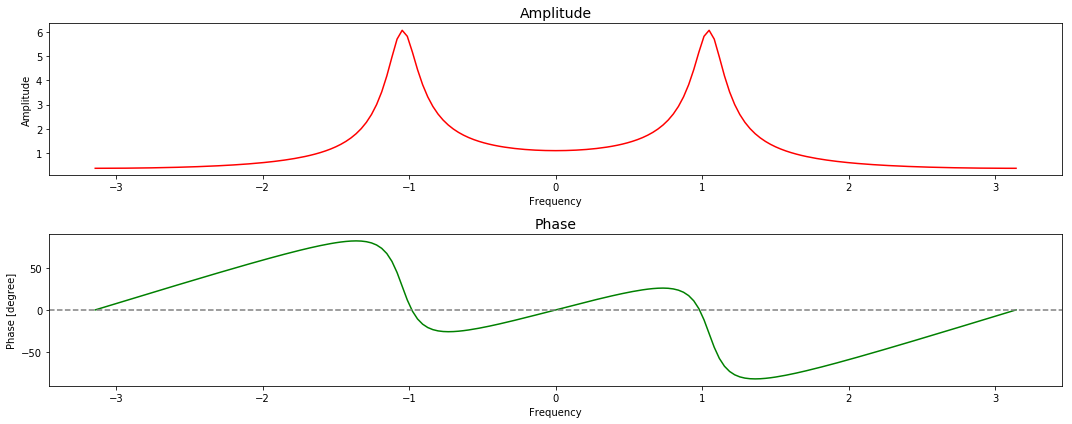

In [45]:
w0 = np.pi/3
p = np.exp(1j*w0)
l = 0.9

b = [1]

poles = [l*p, l*np.conj(p)]
a = filtering.get_polynomials_coeff_from_roots(poles)

w=dsp.get_freq_bins()
freqs, H = filtering.get_H_from_polynomials([b], [a])
filtering.plot_freq_phase_response_pi2(freqs, H)

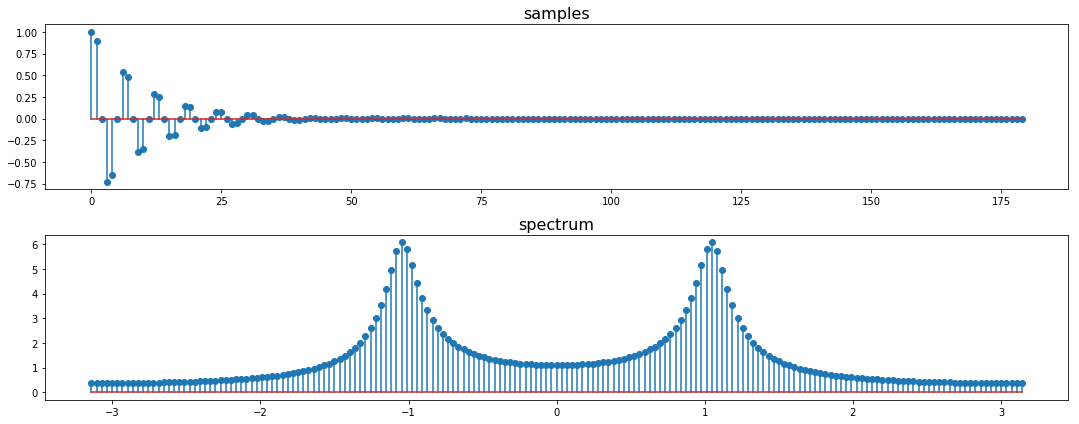

In [46]:
ccde = CCDE_Filter(b, a)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

## MinMax 的 filter 應該具有 linear phase shift

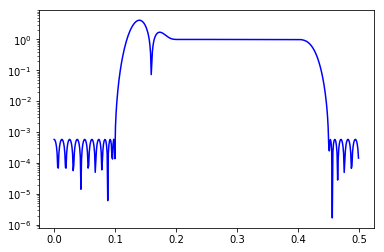

In [47]:
from scipy import signal
bpass = signal.remez(72, [0, 0.1, 0.2, 0.4, 0.45, 0.5], [0, 1, 0])
freq, response = signal.freqz(bpass)#, dsp.get_freq_bins())
ampl = np.abs(response) 

import matplotlib.pyplot as plt
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.semilogy(freq/(2*np.pi), ampl, 'b-')  # freq in Hz
plt.show()

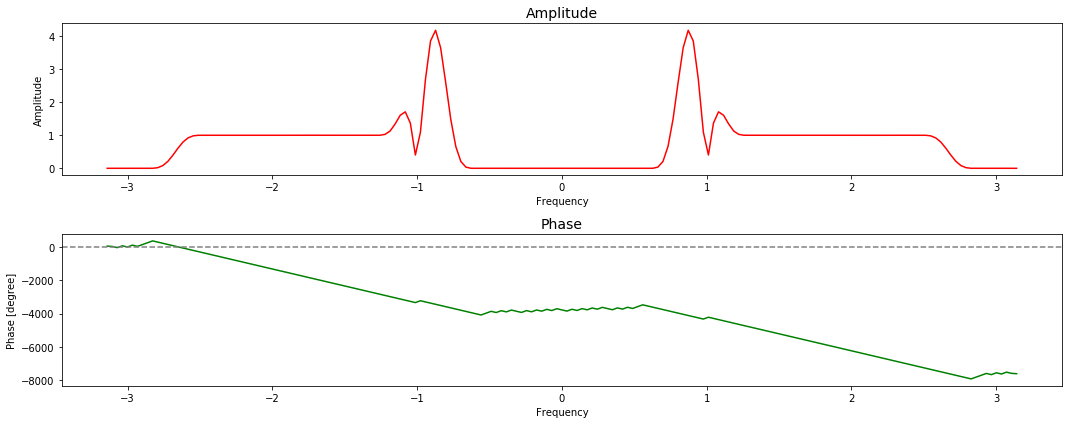

In [48]:
f, h = filtering.get_H_from_polynomials([bpass], plot = True)

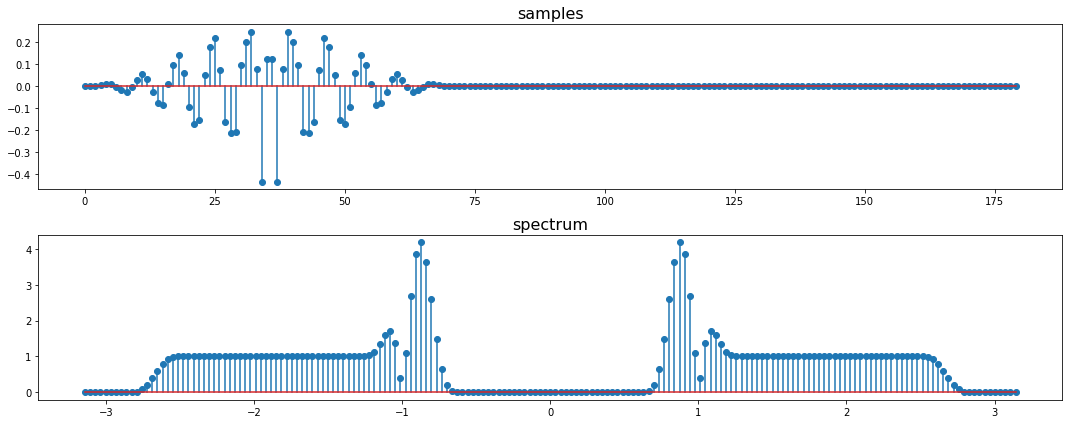

In [49]:
ccde = CCDE_Filter(bpass)
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)

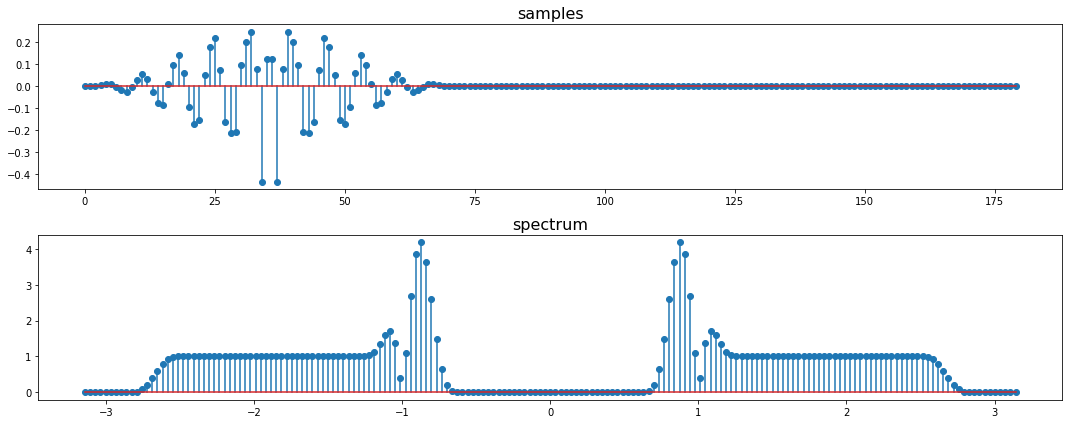

In [50]:
ccde = Remez(72, [0, 0.1, 0.2, 0.4, 0.45, 0.5], [0, 1, 0])
filtered = ccde.filter(delta) 
_ = fourier.dtft(filtered)